# Load in data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving maabarot_johnson_from_2010_04_22_to_2020_12_31.csv to maabarot_johnson_from_2010_04_22_to_2020_12_31 (2).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded2 = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving 4Y_Historical.csv to 4Y_Historical (1).csv


In [ ]:
#Load in solar data
import pandas as pd 
import io
weather = pd.read_csv(io.BytesIO(uploaded2['4Y_Historical.csv']))
weather.head(17) #visualize data

,validdate,t_2m:C,global_rad:W,direct_rad:W,diffuse_rad:W,precip_1h:mm,effective_cloud_cover:p
0,2017-01-01T00:00:00Z,6.3,0.0,0.0,0.0,0.0,24.2
1,2017-01-01T01:00:00Z,6.1,0.0,0.0,0.0,0.0,27.1
2,2017-01-01T02:00:00Z,5.9,0.0,0.0,0.0,0.0,30.2
3,2017-01-01T03:00:00Z,5.7,0.0,0.0,0.0,0.0,33.4
4,2017-01-01T04:00:00Z,6.3,0.0,0.0,0.0,0.0,32.3
5,2017-01-01T05:00:00Z,7.6,15.8,9.2,6.6,0.0,31.2
6,2017-01-01T06:00:00Z,8.5,161.9,100.4,61.5,0.0,30.1
7,2017-01-01T07:00:00Z,10.9,306.3,204.7,101.5,0.0,26.5
8,2017-01-01T08:00:00Z,13.2,410.3,289.4,120.9,0.0,22.8
9,2017-01-01T09:00:00Z,15.4,485.3,350.6,134.7,0.0,19.1


In [ ]:
#Load in solar data
import pandas as pd 
import io
johnson = pd.read_csv(io.BytesIO(uploaded['maabarot_johnson_from_2010_04_22_to_2020_12_31.csv']))
johnson.head(24) #visualize data

,timestamp,min_power,mean_power,max_power
0,2010-04-22 01:00:00,0,0,0
1,2010-04-22 02:00:00,0,0,0
2,2010-04-22 03:00:00,0,0,0
3,2010-04-22 04:00:00,0,0,0
4,2010-04-22 05:00:00,0,0,0
5,2010-04-22 06:00:00,0,0,0
6,2010-04-22 07:00:00,0,0,0
7,2010-04-22 08:00:00,0,0,0
8,2010-04-22 09:00:00,0,0,0
9,2010-04-22 10:00:00,0,0,0


In [ ]:
#convert timestamp version of column ("date") to "timestamp"
weather['timestamp'] = pd.to_datetime(weather['validdate'].astype(str), format='%Y-%m-%dT%H:%M:%SZ') 
weather.drop('validdate', inplace=True, axis=1)
weather_hourly = weather.set_index("timestamp").resample("H").ffill().reset_index().rename(
    {"timestamp": "timestamp"}, axis=1
)
weather_hourly

,timestamp,t_2m:C,global_rad:W,direct_rad:W,diffuse_rad:W,precip_1h:mm,effective_cloud_cover:p
0,2017-01-01 00:00:00,6.3,0.0,0.0,0.0,0.0,24.2
1,2017-01-01 01:00:00,6.1,0.0,0.0,0.0,0.0,27.1
2,2017-01-01 02:00:00,5.9,0.0,0.0,0.0,0.0,30.2
3,2017-01-01 03:00:00,5.7,0.0,0.0,0.0,0.0,33.4
4,2017-01-01 04:00:00,6.3,0.0,0.0,0.0,0.0,32.3
...,...,...,...,...,...,...,...
38612,2021-05-28 20:00:00,19.7,0.0,0.0,0.0,0.0,17.5
38613,2021-05-28 21:00:00,19.1,0.0,0.0,0.0,0.0,19.3
38614,2021-05-28 22:00:00,19.0,0.0,0.0,0.0,0.0,34.4
38615,2021-05-28 23:00:00,19.0,0.0,0.0,0.0,0.0,49.5


In [ ]:
weather_hourly['timestamp'] = pd.to_datetime(weather_hourly['timestamp'])
johnson['timestamp'] = pd.to_datetime(johnson['timestamp'], errors='coerce')

merge = pd.merge(weather_hourly, johnson, left_on = 'timestamp', right_on = 'timestamp')
merge.head(17)

,timestamp,t_2m:C,global_rad:W,direct_rad:W,diffuse_rad:W,precip_1h:mm,effective_cloud_cover:p,min_power,mean_power,max_power
0,2017-01-01 00:00:00,6.3,0.0,0.0,0.0,0.0,24.2,0,0,0
1,2017-01-01 01:00:00,6.1,0.0,0.0,0.0,0.0,27.1,0,0,0
2,2017-01-01 02:00:00,5.9,0.0,0.0,0.0,0.0,30.2,0,0,0
3,2017-01-01 03:00:00,5.7,0.0,0.0,0.0,0.0,33.4,0,0,0
4,2017-01-01 04:00:00,6.3,0.0,0.0,0.0,0.0,32.3,0,0,0
5,2017-01-01 05:00:00,7.6,15.8,9.2,6.6,0.0,31.2,0,0,0
6,2017-01-01 06:00:00,8.5,161.9,100.4,61.5,0.0,30.1,0,0,0
7,2017-01-01 07:00:00,10.9,306.3,204.7,101.5,0.0,26.5,0,0,0
8,2017-01-01 08:00:00,13.2,410.3,289.4,120.9,0.0,22.8,0,1938,4829
9,2017-01-01 09:00:00,15.4,485.3,350.6,134.7,0.0,19.1,7998,12554,16749


# Make Data Stationary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

datatest = adfuller(merge["mean_power"], autolag="AIC") #autolag = Method to use when automatically determining the lag

dfoutput = pd.Series(datatest[0:4], index=["Test Stats", "p-value", "# Lags", "# of obs"])
for key, value in datatest[4].items():
    dfoutput[f"Critical Value ({key})"] = value
print(dfoutput)

#p-value >= 0.05, meaning that our data is not stationary

Test Stats             -1.006221e+01
p-value                 1.324413e-17
# Lags                  5.100000e+01
# of obs                3.424400e+04
Critical Value (1%)    -3.430541e+00
Critical Value (5%)    -2.861624e+00
Critical Value (10%)   -2.566815e+00
dtype: float64


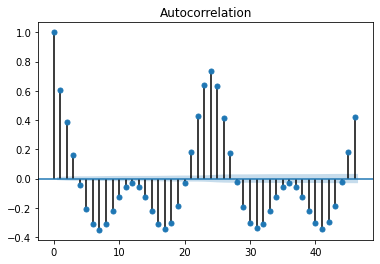

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

merge["1st_diff"] = merge["mean_power"].diff()
merge["2nd_diff"] = merge["1st_diff"].diff()

fig = make_subplots(rows=2, cols=1)

for idx, d in enumerate(["1st_diff", "2nd_diff"]):
    fig.add_trace(
        go.Scatter(
            name = d,
            x = merge.index,
            y = merge[d]
        ),
        row=idx+1,col=1
    )
fig.update_layout(
    title="Differenced plots"
)
fig.show()

plot_acf(merge["1st_diff"].dropna());

# Split data into train, test, validation set

In [ ]:
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(merge, target = 'mean_power', 
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2)

print("TRAINING DATA")
print("The shape of the training predictors (X) is:", X_train.shape)
print("The shape of the training test (Y) is:", y_train.shape)
print("TEST DATA")
print("The shape of the test predictors (X) is:", X_test.shape)
print("The shape of the test (Y) is:", y_test.shape)
print("VALIDATIONS")
print("The shape of the validations (X) is:", X_valid.shape)
print("The shape of the validations (Y) is:", y_valid.shape)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
TRAINING DATA
The shape of the training predictors (X) is: (20577, 11)
The shape of the training test (Y) is: (20577,)
TEST DATA
The shape of the test predictors (X) is: (6860, 11)
The shape of the test (Y) is: (6860,)
VALIDATIONS
The shape of the validations (X) is: (6859, 11)
The shape of the validations (Y) is: (6859,)


# Alternative VAR

In [1]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving maabarot_johnson_from_2010_04_22_to_2020_12_31.csv to maabarot_johnson_from_2010_04_22_to_2020_12_31.csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded2 = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving 4Y_Historical.csv to 4Y_Historical.csv


In [3]:
#Load in solar data
import pandas as pd 
import io
johnson = pd.read_csv(io.BytesIO(uploaded['maabarot_johnson_from_2010_04_22_to_2020_12_31.csv']))
johnson.head() #visualize data

,timestamp,min_power,mean_power,max_power
0,2010-04-22 01:00:00,0,0,0
1,2010-04-22 02:00:00,0,0,0
2,2010-04-22 03:00:00,0,0,0
3,2010-04-22 04:00:00,0,0,0
4,2010-04-22 05:00:00,0,0,0


In [4]:
#Load in solar data
import pandas as pd 
import io
weather = pd.read_csv(io.BytesIO(uploaded2['4Y_Historical.csv']))
weather.head() #visualize data

,validdate,t_2m:C,global_rad:W,direct_rad:W,diffuse_rad:W,precip_1h:mm,effective_cloud_cover:p
0,2017-01-01T00:00:00Z,6.3,0.0,0.0,0.0,0.0,24.2
1,2017-01-01T01:00:00Z,6.1,0.0,0.0,0.0,0.0,27.1
2,2017-01-01T02:00:00Z,5.9,0.0,0.0,0.0,0.0,30.2
3,2017-01-01T03:00:00Z,5.7,0.0,0.0,0.0,0.0,33.4
4,2017-01-01T04:00:00Z,6.3,0.0,0.0,0.0,0.0,32.3


In [5]:
#convert timestamp version of column ("date") to "timestamp"
weather['timestamp'] = pd.to_datetime(weather['validdate'].astype(str), format='%Y-%m-%dT%H:%M:%SZ') 
weather.drop('validdate', inplace=True, axis=1)
weather_hourly = weather.set_index("timestamp").resample("H").ffill().reset_index().rename(
    {"timestamp": "timestamp"}, axis=1
)
weather_hourly

,timestamp,t_2m:C,global_rad:W,direct_rad:W,diffuse_rad:W,precip_1h:mm,effective_cloud_cover:p
0,2017-01-01 00:00:00,6.3,0.0,0.0,0.0,0.0,24.2
1,2017-01-01 01:00:00,6.1,0.0,0.0,0.0,0.0,27.1
2,2017-01-01 02:00:00,5.9,0.0,0.0,0.0,0.0,30.2
3,2017-01-01 03:00:00,5.7,0.0,0.0,0.0,0.0,33.4
4,2017-01-01 04:00:00,6.3,0.0,0.0,0.0,0.0,32.3
...,...,...,...,...,...,...,...
38612,2021-05-28 20:00:00,19.7,0.0,0.0,0.0,0.0,17.5
38613,2021-05-28 21:00:00,19.1,0.0,0.0,0.0,0.0,19.3
38614,2021-05-28 22:00:00,19.0,0.0,0.0,0.0,0.0,34.4
38615,2021-05-28 23:00:00,19.0,0.0,0.0,0.0,0.0,49.5


In [6]:
weather_hourly['timestamp'] = pd.to_datetime(weather_hourly['timestamp'])
johnson['timestamp'] = pd.to_datetime(johnson['timestamp'], errors='coerce')

merge = pd.merge(weather_hourly, johnson, left_on = 'timestamp', right_on = 'timestamp')
merge.head()

,timestamp,t_2m:C,global_rad:W,direct_rad:W,diffuse_rad:W,precip_1h:mm,effective_cloud_cover:p,min_power,mean_power,max_power
0,2017-01-01 00:00:00,6.3,0.0,0.0,0.0,0.0,24.2,0,0,0
1,2017-01-01 01:00:00,6.1,0.0,0.0,0.0,0.0,27.1,0,0,0
2,2017-01-01 02:00:00,5.9,0.0,0.0,0.0,0.0,30.2,0,0,0
3,2017-01-01 03:00:00,5.7,0.0,0.0,0.0,0.0,33.4,0,0,0
4,2017-01-01 04:00:00,6.3,0.0,0.0,0.0,0.0,32.3,0,0,0


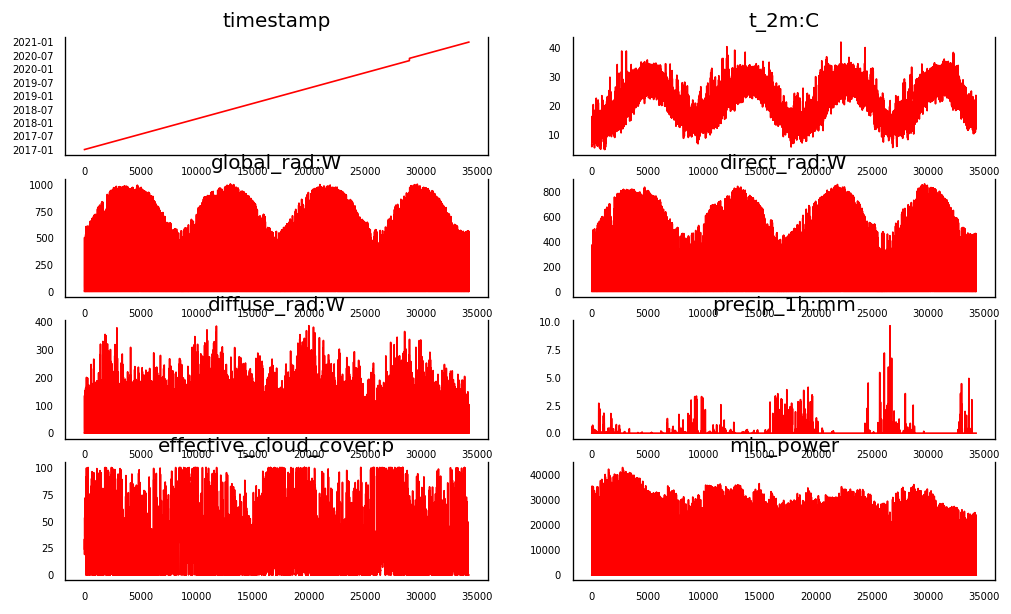

In [7]:
# Plot
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = merge[merge.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(merge.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

In [8]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas.util.testing as tm
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    merge = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in merge.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            merge.loc[r, c] = min_p_value
    merge.columns = [var + '_x' for var in variables]
    merge.index = [var + '_y' for var in variables]
    return merge

    grangers_causation_matrix(merge, variables = merge.columns)   

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

merge['timestamp'] = pd.to_numeric(pd.to_datetime(merge['timestamp']))

def cointegration_test(merge, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(merge,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(merge.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(merge)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
timestamp ::  32055.34  > 219.4051  =>   True
t_2m:C ::  24418.32  > 179.5199  =>   True
global_rad:W ::  18740.32  > 143.6691  =>   True
direct_rad:W ::  13522.83  > 111.7797  =>   True
diffuse_rad:W ::  8986.1    > 83.9383   =>   True
precip_1h:mm ::  5157.92   > 60.0627   =>   True
effective_cloud_cover:p ::  3048.54   > 40.1749   =>   True
min_power ::  1408.46   > 24.2761   =>   True
mean_power ::  152.68    > 12.3212   =>   True
max_power ::  32.07     > 4.1296    =>   True


In [10]:
nobs = 4
merge_train, merge_test = merge[0:-nobs], merge[-nobs:]

# Check size
print(merge_train.shape)  # (34292, 10)
print(merge_test.shape)  # (4, 10)

(34292, 10)
(4, 10)


In [11]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [12]:
# ADF Test on each column

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

for name, column in merge_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "timestamp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 47.1135
 No. Lags Chosen       = 0
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "t_2m:C" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.6256
 No. Lags Chosen       = 50
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "global_rad:W" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-S

In [14]:
# 1st difference
merge_differenced = merge_train.diff().dropna()

In [15]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in merge_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "timestamp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -185.1759
 No. Lags Chosen       = 0
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "t_2m:C" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -33.2744
 No. Lags Chosen       = 49
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "global_rad:W" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

In [16]:
model = VAR(merge_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Lag Order = 1
AIC :  111.67051874783614
BIC :  111.69760206644216
FPE :  3.146951745089449e+48
HQIC:  111.67915382456862 

Lag Order = 2
AIC :  110.55748935636925
BIC :  110.60919520300293
FPE :  1.033969102577309e+48
HQIC:  110.57397494942141 

Lag Order = 3
AIC :  110.45627630314142
BIC :  110.5326059439047
FPE :  9.344397233677757e+47
HQIC:  110.48061283784816 

Lag Order = 4
AIC :  110.05096232372118
BIC :  110.15191702481933
FPE :  6.2305397382519595e+47
HQIC:  110.08315022545298 

Lag Order = 5
AIC :  110.37707059772217
BIC :  110.5026516254638
FPE :  8.632820260137445e+47
HQIC:  110.41711029188521 

Lag Order = 6
AIC :  111.4068933799737
BIC :  111.55710200077078
FPE :  2.4176813325051854e+48
HQIC:  111.45478529200979 

Lag Order = 7
AIC :  110.54267810087035
BIC :  110.71751558123825
FPE :  1.018767635525368e+48
HQIC:  110.59842265625699 

Lag Order = 8
AIC :  110.82294874270681
BIC :  111.02241634926428
FPE :  1.3483267333638066e+48
HQIC:  110.88654636695718 

Lag Order = 9
AI

In [17]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Jul, 2022
Time:                     07:46:35
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    110.152
Nobs:                     34287.0    HQIC:                   110.083
Log likelihood:      -2.37276e+06    FPE:                6.23054e+47
AIC:                      110.051    Det(Omega_mle):     6.15652e+47
--------------------------------------------------------------------
Results for equation timestamp
                                     coefficient            std. error           t-stat            prob
-------------------------------------------------------------------------------------------------------
const                       3678178857984.181641    87721407344.176865           41.930           0.000
L1.timestamp                            0.000292              0.0054

In [18]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = merge_differenced.values[-lag_order:]
forecast_input

4


array([[ 3.600e+12, -2.200e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00, -5.415e+03, -6.576e+03, -7.053e+03],
       [ 3.600e+12, -9.000e-01,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00, -4.235e+03, -6.009e+03, -7.411e+03],
       [ 3.600e+12, -4.000e-01,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00, -5.400e+01, -1.086e+03, -2.523e+03],
       [ 3.600e+12,  3.000e-01,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00]])

In [19]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
merge_forecast = pd.DataFrame(fc, index=merge.index[-nobs:], columns=merge.columns + '_2d')
merge_forecast

,timestamp_2d,t_2m:C_2d,global_rad:W_2d,direct_rad:W_2d,diffuse_rad:W_2d,precip_1h:mm_2d,effective_cloud_cover:p_2d,min_power_2d,mean_power_2d,max_power_2d
34292,3.695420e+12,0.224464,19.679640,13.456342,6.222843,0.004534,1.974547,240.098577,498.408288,569.015405
34293,3.641667e+12,0.273081,36.962844,26.448276,10.514322,-0.001287,1.416735,78.563027,93.628970,259.187811
34294,3.677914e+12,0.370864,39.017172,28.787130,10.229513,-0.002171,0.251990,-206.825129,-171.848363,-58.528002
34295,3.644762e+12,0.368201,31.365055,23.898375,7.467238,0.003297,-0.601911,355.663363,426.504723,457.419648


In [22]:
def invert_transformation(merge_train, merge_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    merge_fc = merge_forecast.copy()
    columns = merge_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            merge_fc[str(col)+'_1d'] = (merge_train[col].iloc[-1]-merge_train[col].iloc[-2]) + merge_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        merge_fc[str(col)+'_forecast'] = merge_train[col].iloc[-1] + merge_fc[str(col)+'_1d'].cumsum()
    return merge_fc

In [23]:
merge_results = invert_transformation(merge_train, merge_forecast, second_diff=True)

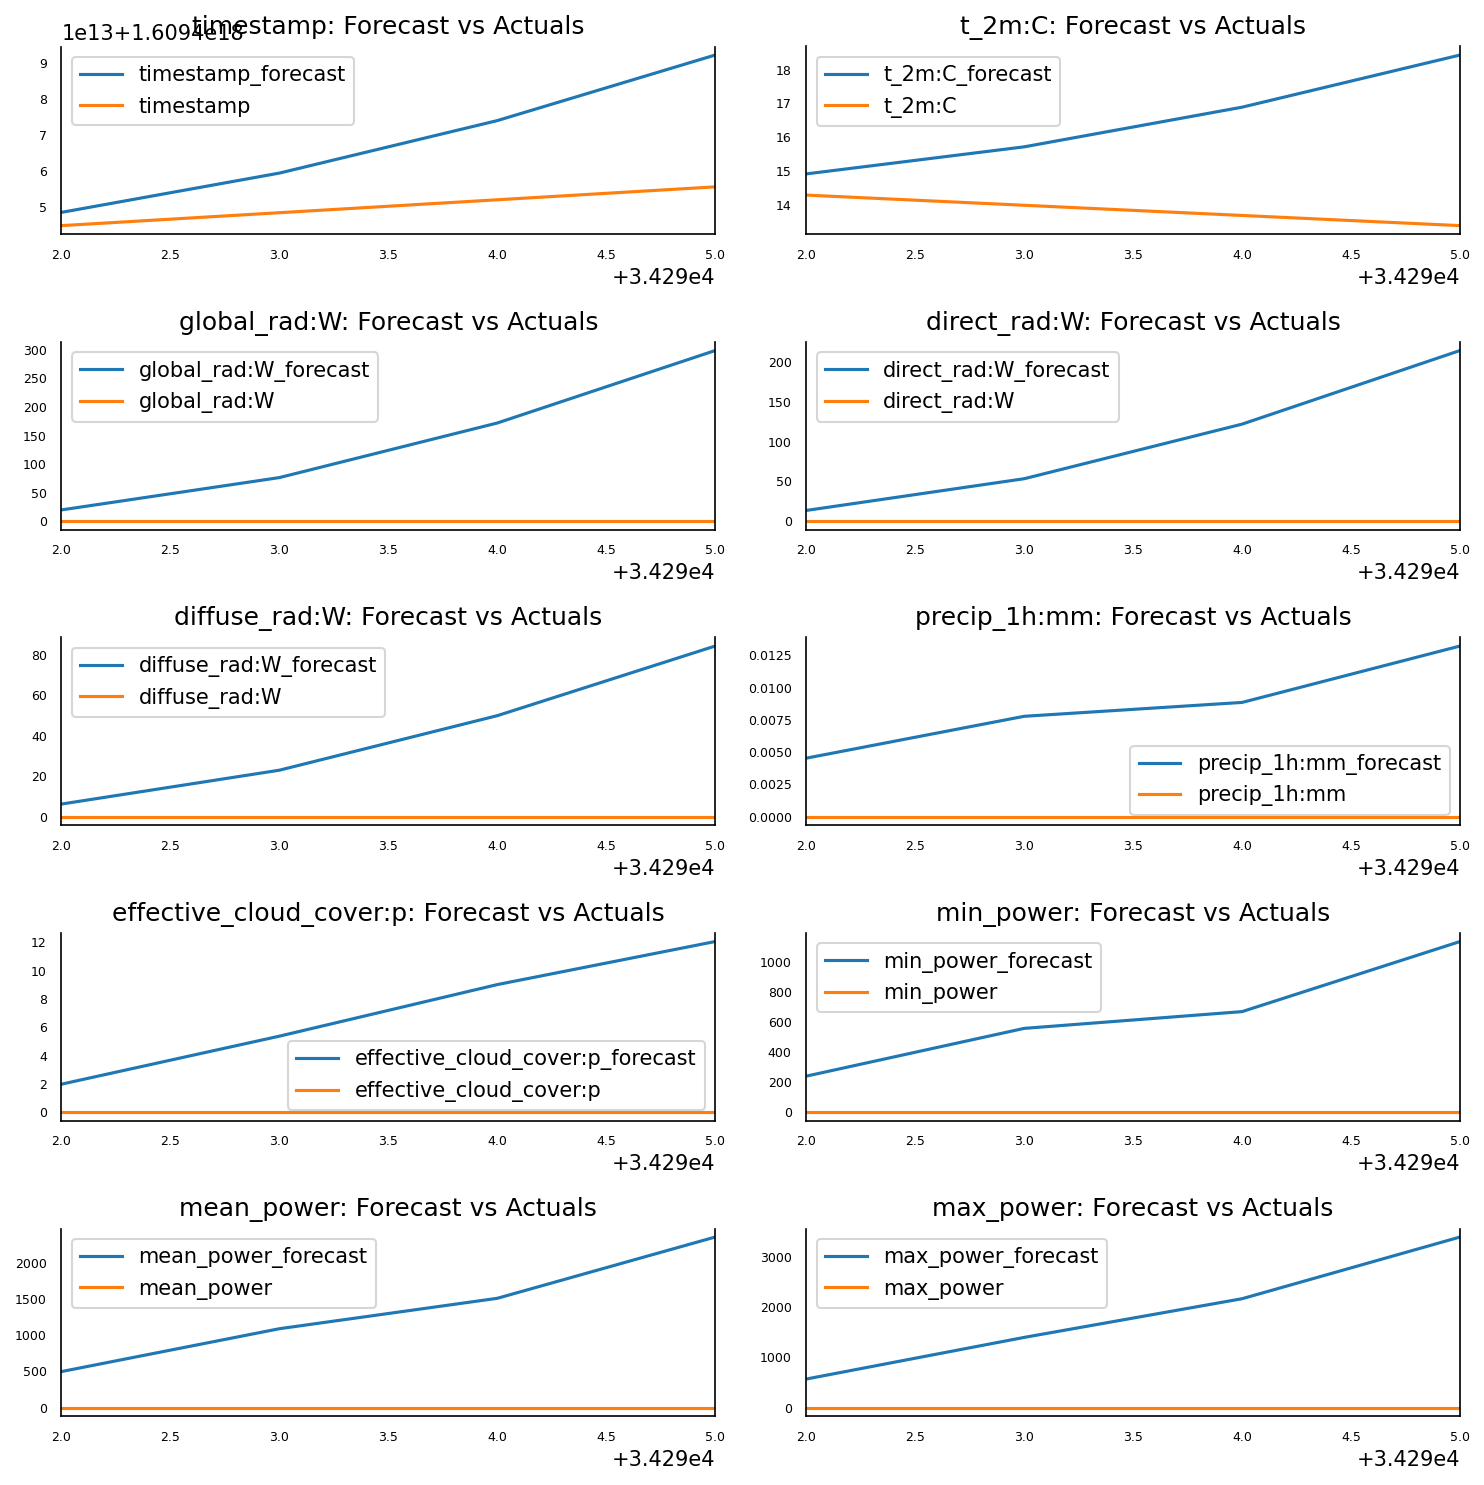

In [26]:
fig, axes = plt.subplots(nrows=int(len(merge.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(merge.columns, axes.flatten())):
    merge_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    merge_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [28]:
from statsmodels.tsa.stattools import acf
#def adjust(val, length= 6): return str(val).ljust(length)
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: mean_power')
accuracy_prod = forecast_accuracy(merge_results['mean_power_forecast'].values, merge_test['mean_power'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: mean_power
mape   :  inf
me     :  1364.2041
mae    :  1364.2041
mpe    :  inf
rmse   :  1522.8669
corr   :  nan
minmax :  1.0


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
